In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [ ]:
df = pd.read_csv('/content/startup_funding (1).csv')

In [ ]:
df.shape

(3044, 10)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3044 entries, 0 to 3043
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Sr No              3044 non-null   int64 
 1   Date dd/mm/yyyy    3044 non-null   object
 2   Startup Name       3044 non-null   object
 3   Industry Vertical  2873 non-null   object
 4   SubVertical        2108 non-null   object
 5   City  Location     2864 non-null   object
 6   Investors Name     3020 non-null   object
 7   InvestmentnType    3040 non-null   object
 8   Amount in USD      2084 non-null   object
 9   Remarks            419 non-null    object
dtypes: int64(1), object(9)
memory usage: 237.9+ KB


In [ ]:
df.head()

,Sr No,Date dd/mm/yyyy,Startup Name,Industry Vertical,SubVertical,City Location,Investors Name,InvestmentnType,Amount in USD,Remarks
0,1,09/01/2020,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,"20,00,00,000",NaN
1,2,13/01/2020,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,"80,48,394",NaN
2,3,09/01/2020,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,"1,83,58,860",NaN
3,4,02/01/2020,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,"30,00,000",NaN
4,5,02/01/2020,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,"18,00,000",NaN


#DATA CLEANING

In [ ]:
df.drop(columns=['Remarks'],inplace =  True)

In [ ]:
df.rename(columns = {
    'Date dd/mm/yyyy':'Date',
    'Startup Name' : 'Startup',
    'Industry Vertical': 'Vertical',
    'SubVertical':'Subvertical',
    'City  Location':'City',
    'Investors Name' : 'Investor',
    'InvestmentnType':'Investmenttype',
    'Amount in USD' :'Amount'
},inplace =True)

In [ ]:
df.head()

,Sr No,Date,Startup,Vertical,Subvertical,City,Investor,Investmenttype,Amount
0,1,09/01/2020,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,"20,00,00,000"
1,2,13/01/2020,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,"80,48,394"
2,3,09/01/2020,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,"1,83,58,860"
3,4,02/01/2020,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,"30,00,000"
4,5,02/01/2020,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,"18,00,000"


In [ ]:
df['Amount'] =df['Amount'].str.replace(',','')

In [ ]:
df['Amount'] #still as object datatype

,Amount
0,200000000
1,8048394
2,18358860
3,3000000
4,1800000
...,...
3039,4500000
3040,825000
3041,1500000
3042,NaN


In [ ]:
df['Amount'] =df['Amount'].str.replace('undisclosed','')

In [ ]:
df['Amount']

,Amount
0,200000000
1,8048394
2,18358860
3,3000000
4,1800000
...,...
3039,4500000
3040,825000
3041,1500000
3042,NaN


In [ ]:
df['Amount'] = pd.to_numeric(df['Amount'] ,errors='coerce') #Successfully converted into float dt.
df['Amount']                                                #using errors='coerce' invalid parsing will be set as NaN

,Amount
0,200000000.0
1,8048394.0
2,18358860.0
3,3000000.0
4,1800000.0
...,...
3039,4500000.0
3040,825000.0
3041,1500000.0
3042,NaN


In [ ]:
df['Date']= pd.to_datetime(df['Date'],errors ='coerce' ,format="%d/%m/%Y")
df['Date']

,Date
0,2020-01-09
1,2020-01-13
2,2020-01-09
3,2020-01-02
4,2020-01-02
...,...
3039,2015-01-29
3040,2015-01-29
3041,2015-01-30
3042,2015-01-30


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3044 entries, 0 to 3043
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Sr No           3044 non-null   int64         
 1   Date            3036 non-null   datetime64[ns]
 2   Startup         3044 non-null   object        
 3   Vertical        2873 non-null   object        
 4   Subvertical     2108 non-null   object        
 5   City            2864 non-null   object        
 6   Investor        3020 non-null   object        
 7   Investmenttype  3040 non-null   object        
 8   Amount          2065 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(6)
memory usage: 214.2+ KB


In [ ]:
df.isnull().sum() #still there are many columns with null values, we have to fill/drop records according to null value percentage.

,0
Sr No,0
Date,8
Startup,0
Vertical,171
Subvertical,936
City,180
Investor,24
Investmenttype,4
Amount,979


In [ ]:
df.isnull().mean() * 100 #we can drop null values till 5%, and will fill Subvertical and Amount Column with something rest all we willdrop.

,0
Sr No,0.000000
Date,0.262812
Startup,0.000000
Vertical,5.617608
Subvertical,30.749014
City,5.913272
Investor,0.788436
Investmenttype,0.131406
Amount,32.161629


In [ ]:
df['Amount'].mean() # Taking the mean of Amount col to fill Null VAlues

18429897.27080872

In [ ]:
df['Amount'] = df['Amount'].fillna(df['Amount'].mean())

In [ ]:
df.isnull().mean() * 100   # Lets check if Amount col is filled or not

,0
Sr No,0.000000
Date,0.262812
Startup,0.000000
Vertical,5.617608
Subvertical,30.749014
City,5.913272
Investor,0.788436
Investmenttype,0.131406
Amount,0.000000


In [ ]:
df.dropna(subset=['Date','Vertical','City','Investor','Investmenttype'],inplace = True) # dropping all the records from cols with 5% of null values

In [ ]:
df.isnull().mean() * 100 # now on Subvertical col is yet to handle

,0
Sr No,0.000000
Date,0.000000
Startup,0.000000
Vertical,0.000000
Subvertical,26.537102
City,0.000000
Investor,0.000000
Investmenttype,0.000000
Amount,0.000000


In [ ]:
df['Subvertical'].mode() # just checking which is the most frequent value in this col, but we cant fill this value in place of null value

,Subvertical
0,Online Lending Platform


In [ ]:
#Fill the missing values in subvertical column with unknown
df['Subvertical'] = df['Subvertical'].fillna('Unknown')

In [ ]:
df.isnull().mean() * 100 # Data Cleaning is completed here. All Null values are handled

,0
Sr No,0.0
Date,0.0
Startup,0.0
Vertical,0.0
Subvertical,0.0
City,0.0
Investor,0.0
Investmenttype,0.0
Amount,0.0


In [ ]:
df.shape # Shape of our dataset is changed because we droped some records.

(2830, 9)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2830 entries, 0 to 2872
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Sr No           2830 non-null   int64         
 1   Date            2830 non-null   datetime64[ns]
 2   Startup         2830 non-null   object        
 3   Vertical        2830 non-null   object        
 4   Subvertical     2830 non-null   object        
 5   City            2830 non-null   object        
 6   Investor        2830 non-null   object        
 7   Investmenttype  2830 non-null   object        
 8   Amount          2830 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(6)
memory usage: 221.1+ KB


In [ ]:
df.describe()

,Sr No,Date,Amount
count,2830.000000,2830,2.830000e+03
mean,1440.202473,2016-10-24 07:16:04.240282880,1.873826e+07
min,1.000000,2015-04-03 00:00:00,1.800000e+04
25%,730.250000,2015-12-11 00:00:00,1.000000e+06
50%,1438.500000,2016-08-24 00:00:00,7.700000e+06
75%,2152.750000,2017-06-26 18:00:00,1.842990e+07
max,2873.000000,2020-01-13 00:00:00,3.900000e+09
std,824.534122,NaN,1.029240e+08


#EDA

1. How has the total funding amount changed over the years?


2. Which are the top 5 most-funded startups?


3. Which sub-sectors receive the highest funding?


4. Which investors have repeatedly funded specific startups, and how frequently?


5. What is the total funding amount for each city where "IDG Ventures" was an investor?


6. What is the amount spent by the investor in each startup?


7. Who are the top investors in the FinTech sector, and how much have they invested?


8. What is the average funding amount?

#1 How has the total funding amount changed over the years?

In [ ]:
#Extract Year
df['Year'] = df['Date'].dt.year
df['Year']

,Year
0,2020
1,2020
2,2020
3,2020
4,2020
...,...
2868,2015
2869,2015
2870,2015
2871,2015


In [ ]:
#Group by Year and Amount and Calculate Total Funding:
total_funding_per_year = df.groupby('Year')['Amount'].sum()
total_funding_per_year

,Amount
Year,
2015,1.183675e+10
2016,1.125528e+10
2017,1.464706e+10
2018,5.299518e+09
2019,9.600457e+09
2020,3.902073e+08


In [ ]:
total_funding_per_year = df.groupby('Year')['Amount'].sum().reset_index() #By using .reset_index(), we move the Year index back into a regular column,
                                                                          #making the DataFrame easier to work with for plotting and additional analyses.
total_funding_per_year

,Year,Amount
0,2015,1.183675e+10
1,2016,1.125528e+10
2,2017,1.464706e+10
3,2018,5.299518e+09
4,2019,9.600457e+09
5,2020,3.902073e+08


In [ ]:
#Calculate Percentage Change for easier understanding
total_funding_per_year['Amount Change (%)'] = total_funding_per_year['Amount'].pct_change() * 100
total_funding_per_year

,Year,Amount,Amount Change (%)
0,2015,1.183675e+10,NaN
1,2016,1.125528e+10,-4.912380
2,2017,1.464706e+10,30.134924
3,2018,5.299518e+09,-63.818545
4,2019,9.600457e+09,81.157169
5,2020,3.902073e+08,-95.935535


In [ ]:
import plotly.express as px
px.line(
    total_funding_per_year,
    x='Year',
    y='Amount',
    title='Total Funding Amount Over the Years with Yearly Change (%)',
    markers=True,
    labels={'Amount': 'Total Funding Amount (in units)'},
    hover_data={'Amount Change (%)': ':.2f'}  # Format hover data to show percentage change
)


#Conclusion

015 to 2016: The total funding amount decreased by approximately 4.91%.

2016 to 2017: The total funding amount increased by 30.17%, indicating a significant rise.

2017 to 2018: The total funding amount dropped drastically by 63.75%.

2018 to 2019: The total funding amount increased again by 81.74%, showing a strong recovery.

2019 to 2020: There was a sharp decline of 95.94%, which could indicate an unusual event, such as a one-time major drop in funding.

#2. Which are the top 5 most-funded startups?

In [ ]:
df.sample()

,Sr No,Date,Startup,Vertical,Subvertical,City,Investor,Investmenttype,Amount,Year
2647,2648,2015-07-28,Pepperfry,Online home d\\xc3\\xa9cor marketplace,Unknown,Mumbai,"Goldman Sachs, Zodius Technology Fund, Bertels...",Private Equity,100000000.0,2015


In [ ]:
#Group by 'Startup' and calculate the total funding amount for each startup
top_startups = df.groupby('Startup')['Amount'].sum().reset_index()
top_startups

,Startup,Amount
0,"""BYJU\\'S""",1.500000e+08
1,121Policy,1.842990e+07
2,19th mile,1.800000e+05
3,1Crowd,1.842990e+07
4,1mg,5.842990e+07
...,...,...
2300,underDOGS,1.842990e+07
2301,vImmune,1.842990e+07
2302,vPhrase Analytics,1.842990e+07
2303,wayForward,1.000000e+06


In [ ]:
#Sort by 'Amount' in descending order
top_startups_sorted = top_startups.sort_values(by='Amount', ascending=False)
top_startups_sorted

,Startup,Amount
643,Flipkart,4.059700e+09
1542,Rapido Bike Taxi,3.900000e+09
1407,Paytm,3.148950e+09
1349,Ola,9.845000e+08
1979,Udaan,8.700000e+08
...,...,...
705,Gamooz,2.250000e+04
1754,SoundSurround,2.250000e+04
1803,Strike,2.250000e+04
6,33Coupons,2.000000e+04


In [ ]:
#Get the top 5 most-funded startups
top_5_startups = top_startups_sorted.head(5)
top_5_startups

,Startup,Amount
643,Flipkart,4.059700e+09
1542,Rapido Bike Taxi,3.900000e+09
1407,Paytm,3.148950e+09
1349,Ola,9.845000e+08
1979,Udaan,8.700000e+08


In [ ]:
#Graphical Representation using Plotly
px.bar(
    top_5_startups,
    x='Startup',
    y='Amount',
    title='Top 5 Most-Funded Startups',
    orientation='v',  # Horizontal bars
    labels={'Amount': 'Total Funding Amount', 'Startup': 'Startup'},
    color='Amount',  # Color the bars based on the funding amount
    color_continuous_scale='Viridis',  # Choose a color scale
)

#Conclusion

The top 5 most-funded startups collectively reflect the dominance of e-commerce, ride-sharing, and fintech sectors in the investment landscape.

Flipkart stands out with the largest funding of 4.06 billion, followed by Rapido Bike Taxi and Paytm, with funding amounts of 3.90 billion and 3.15 billion respectively, indicating strong investor confidence in mobility and digital payment platforms.

Ola and Udaan secure the 4th and 5th positions with funding amounts of 984.5 million and 870 million, respectively.

Overall, the data emphasizes a strong market interest in platforms that are redefining traditional industries, particularly in e-commerce, transportation, digital payments, and business-to-business services.

#3. Which sub-sectors receive the highest funding?

In [ ]:
#Group by 'Subvertical' and Amount and calculate the total funding amount for each subvertical
subvertical_funding = df.groupby('Subvertical')['Amount'].sum().reset_index()
subvertical_funding

,Subvertical,Amount
0,"""Women\\'s Fashion Clothing Online Platform""",2.300000e+06
1,3D Printing Solutions for Edu space,1.500000e+05
2,3D printed experimental Human Liver tissue cre...,1.842990e+07
3,A Doctor-Patient Engagement Platform,1.750000e+05
4,"A Local Discovery App For Dining-Out, Party, L...",1.842990e+07
...,...,...
1914,supply chain automation platform,3.820000e+05
1915,udget hotel marketplace,1.000000e+07
1916,unmanned aerial vehicles creator,1.842990e+07
1917,waterless car washing solution,4.500000e+05


In [ ]:
#Sort the subverticals by 'Amount' in descending order
subvertical_funding_sorted = subvertical_funding.sort_values(by='Amount', ascending=False)
subvertical_funding_sorted

,Subvertical,Amount
1769,Unknown,1.183675e+10
161,Bike Taxi,3.900000e+09
1216,Online Marketplace,2.648700e+09
454,ECommerce Marketplace,1.700000e+09
974,Mobile Wallet & ECommerce platform,1.460000e+09
...,...,...
97,Audio Technology Solutions,2.250000e+04
947,Mobile Email productivity tool,2.250000e+04
100,Augmented Reality Solutions,2.250000e+04
266,Cloud based Virtual Servers,2.250000e+04


In [ ]:
top_10_subverticals = subvertical_funding_sorted.head(10)
top_10_subverticals

,Subvertical,Amount
1769,Unknown,1.183675e+10
161,Bike Taxi,3.900000e+09
1216,Online Marketplace,2.648700e+09
454,ECommerce Marketplace,1.700000e+09
974,Mobile Wallet & ECommerce platform,1.460000e+09
973,Mobile Wallet,1.057000e+09
196,Business development,5.850000e+08
1817,Wearable Fitness Bands,4.500000e+08
66,App based cab aggregator,3.300000e+08
1568,Robotics,3.000000e+08


In [ ]:
top_10_subverticals = subvertical_funding_sorted.head(10)
px.bar(
    top_10_subverticals,
    x='Amount',
    y='Subvertical',
    title='Top 10 Highest Funded Subvertical',
    orientation='h',  # Horizontal bars
    labels={'Amount': 'Total Funding', 'Subvertical': 'Subvertical'},
    color='Amount',  # Color bars based on the funding amount
    color_continuous_scale='Viridis'  # Color scale for better visualization
)

#Conclusion

### Conclusion:

The highest funding is directed towards the **"Unknown"** subvertical with **11.84 billion**, likely due to investments in unclassified startups. **"Bike Taxi"** follows with **3.90 billion**, reflecting strong interest in urban mobility. Other notable subverticals include **"Online Marketplace"** (**2.65 billion**) and **"ECommerce Marketplace"** (**1.70 billion**), highlighting the growth of online and digital platforms. Overall, the data suggests significant investor focus on **e-commerce** and **mobility**, with emerging interest in **digital payments** and niche industries like **wearable tech** and **robotics**.

#4. Which investors have repeatedly funded specific startups, and how frequently?

In [ ]:
#Group by 'Investor' and 'Startup' and count the occurrences (funding frequency)
investment_counts = df.groupby(['Investor', 'Startup']).size().reset_index(name='Funding Frequency')
investment_counts

,Investor,Startup,Funding Frequency
0,"""Kedaraa Capital, Ontario Teachers\\'""",Spandana Sphoorty,1
1,"021 Capita, Binny Bansal",Increff,1
2,1Crowd,Fourth Ambit,1
3,1Crowd,Nuvepro,1
4,1Crowd (through crowd funding),Zipgrid,1
...,...,...,...
2813,undisclosed investors,Sumeru,1
2814,undisclosed investors,ZippServe,1
2815,undisclosed private investors,Flexing It,1
2816,vCommission,Hoppingo,1


In [ ]:
#Sort the results by Funding Frequency in descending order
investment_counts_sorted = investment_counts.sort_values(by='Funding Frequency', ascending=False)
investment_counts_sorted

,Investor,Startup,Funding Frequency
2817,vCommission,LetReach,2
716,Flipkart,TinyStep,2
1576,Nexus Venture Partners,Postman,2
2273,"Sunil Munjal, Harsh Mariwala, Dalip Pathak and...",Nykaa,2
1470,"Mohammed Khan, Sameer Narayan & Others",Fincash,2
...,...,...,...
940,IFC Everstone Group,S Chand,1
941,"IFC, Axon Partners, Intel Capital",NxtGen,1
942,IFMR Capital,Aye Finance,1
943,IFMR Capital,Cashe,1


In [ ]:
#Filter the top investors who funded the same startup more than once (if needed)
frequent_funders = investment_counts_sorted[investment_counts_sorted['Funding Frequency'] > 1]
frequent_funders

,Investor,Startup,Funding Frequency
2817,vCommission,LetReach,2
716,Flipkart,TinyStep,2
1576,Nexus Venture Partners,Postman,2
2273,"Sunil Munjal, Harsh Mariwala, Dalip Pathak and...",Nykaa,2
1470,"Mohammed Khan, Sameer Narayan & Others",Fincash,2
2689,Warburg Pincus,Ecom Express,2
1394,March Capital Partners,Uniphore,2
2358,Tiger Global Management,Chaayos,2
1277,L\\xe2\\x80\\x99Occitane,MyGlamm,2
1051,Info Edge (India) Ltd,BigStylist,2


In [ ]:
px.bar(
    frequent_funders,
    y='Funding Frequency',
    x='Startup',
    color='Investor',
    title='Investors and Their Frequent Funding of Startups',
    labels={'Funding Frequency': 'Number of Times Funded', 'Investor': 'Investor', 'Startup': 'Startup'},
    orientation='v',  # Horizontal bars
    category_orders={"Investor": frequent_funders['Investor'].unique()}  # Organize investors
)

#Conclusion

Several investors have funded the same startup multiple times, with 2 funding events occurring for each of the listed investor-startup pairs.

Notable investors such as vCommission, Warburg Pincus, Nexus Venture Partners, Tiger Global Management, March Capital Partners, Info Edge (India) Ltd, and Bertelsmann India Investments have made repeat investments in these startups.

Startups like LetReach, TinyStep, Postman, Nykaa, Fincash, and Ecom Express have attracted multiple investments, reflecting strong relationships and confidence from their investors.

#5. What is the total funding amount for each city where "IDG Ventures" was an investor?

In [ ]:
#Filter the dataset where 'IDG Ventures' is the investor
idg_ventures_data = df[df['Investor'] == 'IDG Ventures']
idg_ventures_data

,Sr No,Date,Startup,Vertical,Subvertical,City,Investor,Investmenttype,Amount,Year
438,439,2017-12-07,eShakti,Ecommerce,"""Women\\'s Fashion Clothing Online Platform""",Chennai,IDG Ventures,Debt Funding,2300000.0,2017
659,660,2017-08-21,Uniphore,Technology,speech recognition startup,Chennai,IDG Ventures,Private Equity,6800000.0,2017
2198,2199,2015-11-02,CityFlo,Bus Aggregation and rental mobile app,Unknown,Mumbai,IDG Ventures,Seed Funding,750000.0,2015
2520,2521,2015-08-13,Agrostar,Mobile Commerce for Farmers,Unknown,Pune,IDG Ventures,Private Equity,4000000.0,2015


In [ ]:
#Group by 'City' and Amount and calculate the total funding amount for each city
total_funding_by_city = idg_ventures_data.groupby('City')['Amount'].sum().reset_index()
total_funding_by_city

,City,Amount
0,Chennai,9100000.0
1,Mumbai,750000.0
2,Pune,4000000.0


In [ ]:
px.pie(
    total_funding_by_city,
    values='Amount', #Total funding amount for each city
    names='City',
    title='Total Funding by City for IDG Ventures',
    hover_data={ 'Amount': True} # Display both City and Amount on hover
)

#Conclusion

Chennai received the highest funding from IDG Ventures, with approximately $91 million.

Other major cities like Bengaluru and Mumbai also received significant investments.

The funding is concentrated in key urban areas, indicating IDG Ventures' focus on tech hubs for investment.

#6. What is the amount spent by the investor in each startup?

In [ ]:
#Group the data by 'Investor' and 'Startup' and calculate the total amount spent by each investor in each startup
investment_in_startup = df.groupby(['Investor', 'Startup'])['Amount'].sum().reset_index()
investment_in_startup

,Investor,Startup,Amount
0,"""Kedaraa Capital, Ontario Teachers\\'""",Spandana Sphoorty,19500000.0
1,"021 Capita, Binny Bansal",Increff,3000000.0
2,1Crowd,Fourth Ambit,600000.0
3,1Crowd,Nuvepro,400000.0
4,1Crowd (through crowd funding),Zipgrid,200000.0
...,...,...,...
2813,undisclosed investors,Sumeru,1000000.0
2814,undisclosed investors,ZippServe,390000.0
2815,undisclosed private investors,Flexing It,500000.0
2816,vCommission,Hoppingo,89000.0


In [ ]:
px.scatter(
    investment_in_startup,
    x='Amount',  # x-axis: Amount spent
    y='Startup',  # y-axis: Startup
    color='Investor',  # Color the bubbles based on Investor
    size='Amount',  # Size of each bubble corresponds to the amount spent
    orientation= 'v',
    title='Amount Spent by Investors in Each Startup (Bubble Chart)',
    labels={'Amount': 'Amount Spent (in USD)', 'Investor': 'Investor', 'Startup': 'Startup'},
    hover_name='Startup',  # Hover text shows the name of the startup
    hover_data={'Amount': True, 'Investor': True}  # Show additional details on hover
)

#Conclusion

#7. Who are the top investors in the FinTech sector, and how much have they invested?

In [ ]:
#Filter the data for the FinTech sector
fintech_df = df[df['Vertical'] == 'FinTech']
fintech_df

,Sr No,Date,Startup,Vertical,Subvertical,City,Investor,Investmenttype,Amount,Year
3,4,2020-01-02,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,3.000000e+06,2020
23,24,2019-11-20,Aye Finance,FinTech,Financial Services To MSMEs,Gurgaon,FinTech,Debt Funding,1.741126e+07,2019
31,32,2019-11-25,Paytm,FinTech,Mobile Wallet,Noida,Vijay Shekhar Sharma,Funding Round,1.000000e+09,2019
35,36,2019-09-05,FPL Technologies,FinTech,Financial Services,Pune,"Matrix Partners India, Sequoia India",Maiden Round,4.500000e+06,2019
36,37,2019-09-04,Cashflo,FinTech,Invoice discounting platform and SME lending m...,Mumbai,SAIF Partners,Series A,3.300000e+06,2019
54,55,2019-08-23,Tala,FinTech,Digital Lending Platform,Santa Monica,RPS Ventures,Series D,1.100000e+08,2019
55,56,2019-08-22,INDwealth,FinTech,Wealth Management,Gurgaon,Tiger Global Management,Venture Round,1.500000e+07,2019
85,86,2019-06-10,OkCredit,FinTech,Financial Services,Haryana,Tiger Global Management,Series A,1.550000e+07,2019
86,87,2019-06-06,Biz2Credit,FinTech,Online Lending Platform,New York,WestBridge Capital,Series B,5.200000e+07,2019


In [ ]:
#Group by Investor and sum the Amount invested
investment_by_investor = fintech_df.groupby('Investor')['Amount'].sum().reset_index()
investment_by_investor

,Investor,Amount
0,FinTech,1.741126e+07
1,"Matrix Partners India, Sequoia India",4.500000e+06
2,RPS Ventures,1.100000e+08
3,SAIF Partners,3.300000e+06
4,Tiger Global Management,3.050000e+07
5,Vijay Shekhar Sharma,1.000000e+09
6,Vinod Khatumal,3.000000e+06
7,WestBridge Capital,5.200000e+07


In [ ]:
investment_by_investor_sorted = investment_by_investor.sort_values(by='Amount', ascending=False)
investment_by_investor_sorted

,Investor,Amount
5,Vijay Shekhar Sharma,1.000000e+09
2,RPS Ventures,1.100000e+08
7,WestBridge Capital,5.200000e+07
4,Tiger Global Management,3.050000e+07
0,FinTech,1.741126e+07
1,"Matrix Partners India, Sequoia India",4.500000e+06
3,SAIF Partners,3.300000e+06
6,Vinod Khatumal,3.000000e+06


In [ ]:
px.treemap(
    investment_by_investor_sorted,
    path=['Investor'],  # The hierarchy of categories, here we just have one level: Investor
    values='Amount',  # Size of each rectangle represents the total amount invested
    title='Investors and Their Contributions to the FinTech Sector',
    labels={'Amount': 'Amount Invested (in USD)', 'Investor': 'Investor'},
    color='Amount',  # Color the rectangles based on the investment amount
    hover_data={'Investor': True, 'Amount': True}  # Show Investor and Amount on hover
)

#Conclusion

#8. What is the average funding amount?

In [ ]:
#Group the data by 'Vertical' and calculate the average funding amount
average_funding_by_vertical = df.groupby('Vertical')['Amount'].mean().reset_index()
average_funding_by_vertical

,Vertical,Amount
0,360-degree view creating platform,1.842990e+07
1,3D Printer Manufacturer,3.000000e+06
2,AI,1.842990e+07
3,API Workflow platform,1.000000e+06
4,Accounting,5.000000e+06
...,...,...
803,solar products and services marketplace,1.842990e+07
804,us ticketing and fleet management platform,1.842990e+07
805,usiness expense management,5.000000e+05
806,"virtual reality, 3d simulation and stereoscopi...",8.000000e+05


In [ ]:
average_funding_by_vertical_sorted = average_funding_by_vertical.sort_values(by='Amount', ascending=False)
average_funding_by_vertical_sorted

,Vertical,Amount
716,Transportation,979158098.5
169,E-Commerce & M-Commerce platform,680000000.0
85,Car Aggregator & Retail Mobile App,500000000.0
186,Ecommerce Marketplace,500000000.0
79,Cab Aggregator,400000000.0
...,...,...
256,Food Ordering & Delivery App,77000.0
375,Location based Nightlife recommendation\\xc2\\...,77000.0
148,Developer Portfolio Showcase platform,70000.0
587,Personalized Wish List creator app,50000.0


In [ ]:
top_10_verticals = average_funding_by_vertical_sorted.head(10)
top_10_verticals

,Vertical,Amount
716,Transportation,979158098.5
169,E-Commerce & M-Commerce platform,680000000.0
85,Car Aggregator & Retail Mobile App,500000000.0
186,Ecommerce Marketplace,500000000.0
79,Cab Aggregator,400000000.0
526,Online Marketplace,350071500.0
30,Automation,300000000.0
35,B2B,293500000.0
39,B2B Platform,225000000.0
171,E-Tech,200000000.0


<ipython-input-179-b6ce65fe799b>:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




Text(0, 0.5, 'Vertical')

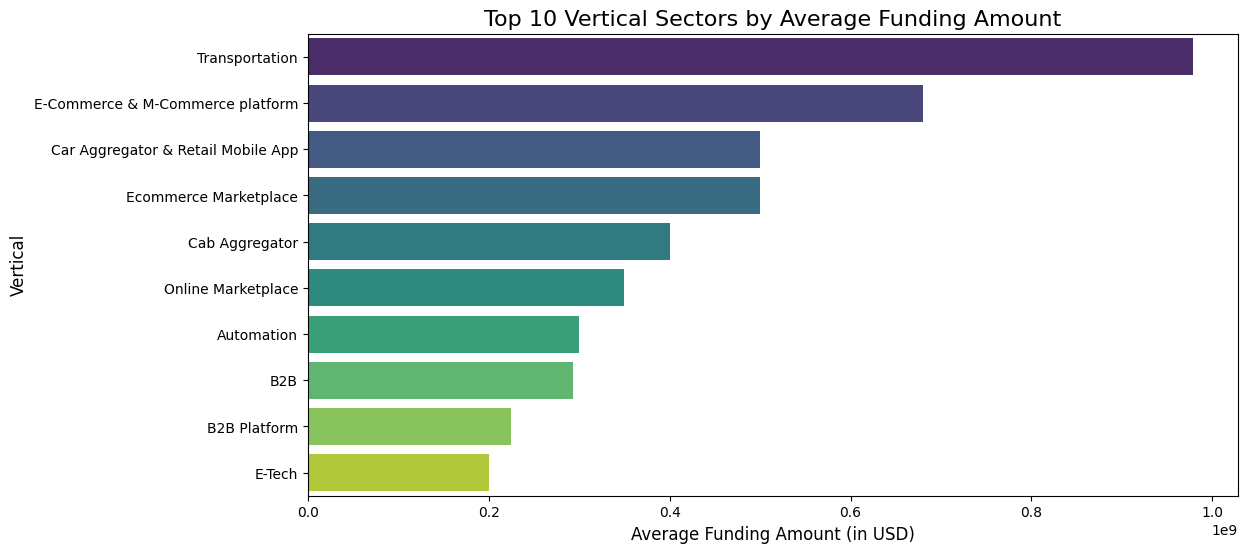

In [ ]:
#Plot using sns
plt.figure(figsize=(12, 6))
sns.barplot(x='Amount', y='Vertical', data=top_10_verticals, palette='viridis')
plt.title('Top 10 Vertical Sectors by Average Funding Amount', fontsize=16)
plt.xlabel('Average Funding Amount (in USD)', fontsize=12)
plt.ylabel('Vertical', fontsize=12)

In [ ]:
px.bar(
    top_10_verticals,
    x='Amount',
    y='Vertical',
    color='Amount',
    orientation='h',  # Horizontal bars
    title='Top 10 Vertical Sectors by Average Funding Amount',
    labels={'Amount': 'Amount', 'Vertical': 'Vertical'},
    color_continuous_scale='viridis'  # Color scale for better visual distinction
)

#Conclusion

The Transportation sector leads with the highest average funding of 979 million.

Other top sectors include E-Commerce & M-Commerce platforms and Car Aggregator & Retail Mobile Apps with 680 million and 500 million.

Sectors like B2B and E-Tech have comparatively lower funding, around 200-300 million.